# Projeto de Filtro FIR Passa-Baixa com Janela de Kaiser

## Introdu√ß√£o

Filtros FIR (Finite Impulse Response) s√£o amplamente utilizados devido √† sua estabilidade e fase linear. Neste trabalho, projetamos um filtro FIR passa-baixa usando o m√©todo da janela de Kaiser, garantindo:

- Atenua√ß√£o na banda rejeitada ‚â• 50 dB
- Frequ√™ncia de corte: œâc = œÄ/2
- Regi√£o de transi√ß√£o: Œîœâ < 0,1œÄ

Para isso, empregamos a biblioteca SciPy para calcular a resposta do filtro e suas transforma√ß√µes.

## Filtro FIR Passa-Baixa

O filtro ser√° projetado pelo m√©todo da janela, usando a janela de Kaiser, que permite controlar a transi√ß√£o e atenua√ß√£o com o par√¢metro Œ≤.

### C√°lculo do Par√¢metro Œ≤

O valor de Œ≤ depende da atenua√ß√£o desejada:

<img src="https://github.com/JoseRaimundo27/FiltroFIR/blob/main/images/CalculoBeta.png?raw=1" />

In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Par√¢metros do filtro
atenuacao_desejada = 50  # dB
frequencia_corte = np.pi / 2  # œâc = œÄ/2
largura_transicao = 0.1 * np.pi  # Œîœâ < 0,1œÄ

# C√°lculo do par√¢metro Œ≤
beta = 0.5842 * (atenuacao_desejada - 21) ** 0.4 + 0.07886 * (atenuacao_desejada - 21)

print(f"Par√¢metro Œ≤ calculado: {beta}")

Par√¢metro Œ≤ calculado: 4.533514120981248


### Projeto do Filtro

Com o valor de Œ≤ calculado, podemos projetar o filtro FIR passa-baixa usando a janela de Kaiser. A seguir, apresentamos o c√≥digo para projetar o filtro e plotar sua resposta em frequ√™ncia.

O valor de M ser√°:

<img src="https://github.com/JoseRaimundo27/FiltroFIR/blob/main/images/CalculoM.png?raw=1" />

In [50]:
# C√°lculo da ordem M do filtro (num_taps)


M = int(np.ceil((atenuacao_desejada - 8) / (2.285 * largura_transicao)))

print(f"Par√¢metro M calculado: {M}")

Par√¢metro M calculado: 59


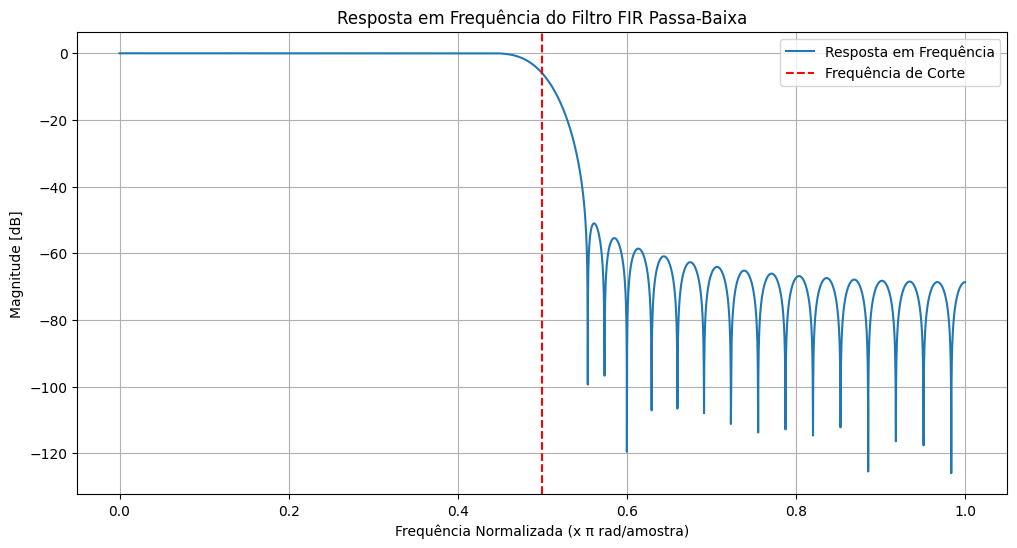

In [51]:


# Projeta o filtro FIR
h_fir = signal.firwin(M, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

h_fir_original = h_fir


# Resposta em frequ√™ncia do filtro
frequencias, resposta = signal.freqz(h_fir, worN=8000)

# Plot da resposta em frequ√™ncia
plt.figure(figsize=(12, 6))
plt.plot(frequencias / np.pi, 20 * np.log10(np.abs(resposta)), label='Resposta em Frequ√™ncia')

# Configura√ß√£o do gr√°fico
plt.title('Resposta em Frequ√™ncia do Filtro FIR Passa-Baixa')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte / np.pi, color='red', linestyle='--', label='Frequ√™ncia de Corte')
plt.legend()
plt.show()


### Implementa√ß√£o nas Formas Direta e em Cascata

A *forma direta* utiliza os coeficientes do filtro diretamente. Vamos quantizar os coeficientes para estudar a sensibilidade √† quantiza√ß√£o.

A *forma em cascata* decomp√µe o filtro em se√ß√µes de segunda ordem (SOS). Vamos usar a fun√ß√£o tf2sos da SciPy para converter a forma direta em cascata.

In [52]:
N = M + 1  # Comprimento correto do filtro
frequencia_corte = 0.5 * np.pi  # Frequ√™ncia de corte normalizada
beta = 4.55  # Par√¢metro da janela de Kaiser

# Criar o filtro FIR com o comprimento correto (N)
h_fir_original = signal.firwin(N, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

# **Forma direta** - coeficientes do filtro FIR
print("Coeficientes da forma direta (precis√£o infinita):")
print(h_fir_original)

# **Forma em cascata** - utilizando zeros, polos e ganho
z, p, k = signal.tf2zpk(h_fir_original, [1])  # Zeros, Polos e Ganho
sos_cascata = signal.zpk2sos(z, p, k)  # Converter para SOS

# Exibir os coeficientes na forma cascata
print("\nCoeficientes da forma em cascata (precis√£o infinita):")
print(sos_cascata)

Coeficientes da forma direta (precis√£o infinita):
[ 4.17648185e-04  5.94785088e-04 -8.07310872e-04 -1.05921259e-03
  1.35476839e-03  1.69859618e-03 -2.09572044e-03 -2.55166312e-03
  3.07256658e-03  3.66535958e-03 -4.33798173e-03 -5.09968820e-03
  5.96146647e-03  6.93661208e-03 -8.04153447e-03 -9.29690297e-03
  1.07293082e-02  1.23737263e-02 -1.42772723e-02 -1.65051020e-02
  1.91500404e-02  2.23490064e-02 -2.63125718e-02 -3.13817978e-02
  3.81470600e-02  4.77252880e-02 -6.25124398e-02 -8.87418671e-02
  1.49276046e-01  4.49898797e-01  4.49898797e-01  1.49276046e-01
 -8.87418671e-02 -6.25124398e-02  4.77252880e-02  3.81470600e-02
 -3.13817978e-02 -2.63125718e-02  2.23490064e-02  1.91500404e-02
 -1.65051020e-02 -1.42772723e-02  1.23737263e-02  1.07293082e-02
 -9.29690297e-03 -8.04153447e-03  6.93661208e-03  5.96146647e-03
 -5.09968820e-03 -4.33798173e-03  3.66535958e-03  3.07256658e-03
 -2.55166312e-03 -2.09572044e-03  1.69859618e-03  1.35476839e-03
 -1.05921259e-03 -8.07310872e-04  5.947

Projetamos o filtro FIR utilizando a janela de Kaiser, garantindo um controle preciso sobre sua resposta em frequ√™ncia. Inicialmente, os coeficientes s√£o calculados na forma direta, onde o filtro √© aplicado por convolu√ß√£o. Em seguida, os coeficientes s√£o convertidos para a forma em cascata (SOS), melhorando a estabilidade num√©rica e a implementa√ß√£o em hardware. A convers√£o √© feita utilizando a decomposi√ß√£o em zeros, polos e ganho (ZPK), seguida da reorganiza√ß√£o em se√ß√µes de segunda ordem. Esse processo permite uma implementa√ß√£o eficiente do filtro, minimizando erros de arredondamento e preservando a precis√£o da resposta.

In [88]:
import numpy as np
import scipy.signal as signal
import pandas as pd

# Definir par√¢metros do filtro
M = 59  # Ordem do filtro
N = M + 1  # Comprimento correto do filtro
frequencia_corte = 0.5 * np.pi  # Frequ√™ncia de corte normalizada
beta = 4.55  # Par√¢metro da janela de Kaiser

# Criar o filtro FIR com o comprimento correto (N)
h_fir_original = signal.firwin(N, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

# **Forma direta** - coeficientes do filtro FIR
z, p, k = signal.tf2zpk(h_fir_original, [1])  # Zeros, Polos e Ganho
sos_cascata = signal.zpk2sos(z, p, k)  # Converter para SOS

# Criar os √≠ndices h[0] at√© h[59] para a forma direta
indices_fir = [f'h[{i}]' for i in range(len(h_fir_original))]

# Criar um DataFrame com os coeficientes quantizados para diferentes precis√µes (FIR)
df_coeficientes_fir = pd.DataFrame({
    '√çndice': indices_fir,
    '6 Casas': np.round(h_fir_original, 6),
    '5 Casas': np.round(h_fir_original, 5),
    '4 Casas': np.round(h_fir_original, 4),
    '3 Casas': np.round(h_fir_original, 3),
    '2 Casas': np.round(h_fir_original, 2),
    '1 Casa': np.round(h_fir_original, 1),
})

# **Forma em cascata (SOS)**
# Criar √≠ndices "H‚ÇÅ(Z), H‚ÇÇ(Z), ..., H‚Çô(Z)" para cada se√ß√£o da forma cascata
indices_sos = [f'H_{i+1}(Z)' for i in range(len(sos_cascata))]

# Criar um DataFrame separado para armazenar os coeficientes da forma em cascata, excluindo a0, a1 e a2
column_names = ['b0', 'b1', 'b2']
df_coeficientes_sos = pd.DataFrame({'H_i(Z)': indices_sos})  # Adiciona os √≠ndices primeiro

# Adicionar colunas para quantiza√ß√µes de 6 a 1 casas decimais
for prec in [6, 5, 4, 3, 2, 1]:
    for i, col in enumerate(column_names):
        df_coeficientes_sos[f'{prec} Casas {col}'] = np.round(sos_cascata[:, i], prec)

# Salvar em arquivos Excel
df_coeficientes_fir.to_excel("coeficientes_fir.xlsx", index=False)
df_coeficientes_sos.to_excel("coeficientes_sos.xlsx", index=False)

# Exibir os DataFrames dentro do Jupyter Notebook
from IPython.display import display
print("‚úÖ Coeficientes da forma direta (Precis√£o Finita)")
display(df_coeficientes_fir)
print("‚úÖ Coeficientes da forma em cascata (Precis√£o Finita)")
display(df_coeficientes_sos)


‚úÖ Coeficientes da forma direta (Precis√£o Finita)


√çndice   6 Casas  5 Casas  4 Casas  3 Casas  2 Casas  1 Casa
0    h[0]  0.000418  0.00042   0.0004    0.000     0.00     0.0
1    h[1]  0.000595  0.00059   0.0006    0.001     0.00     0.0
2    h[2] -0.000807 -0.00081  -0.0008   -0.001    -0.00    -0.0
3    h[3] -0.001059 -0.00106  -0.0011   -0.001    -0.00    -0.0
4    h[4]  0.001355  0.00135   0.0014    0.001     0.00     0.0
5    h[5]  0.001699  0.00170   0.0017    0.002     0.00     0.0
6    h[6] -0.002096 -0.00210  -0.0021   -0.002    -0.00    -0.0
7    h[7] -0.002552 -0.00255  -0.0026   -0.003    -0.00    -0.0
8    h[8]  0.003073  0.00307   0.0031    0.003     0.00     0.0
9    h[9]  0.003665  0.00367   0.0037    0.004     0.00     0.0
10  h[10] -0.004338 -0.00434  -0.0043   -0.004    -0.00    -0.0
11  h[11] -0.005100 -0.00510  -0.0051   -0.005    -0.01    -0.0
12  h[12]  0.005961  0.00596   0.0060    0.006     0.01     0.0
13  h[13]  0.006937  0.00694   0.0069    0.007     0.01     0.0
14  h[14] -0.008042 -0.00804  -0.0080   -0.008    -0.01    -0.0
15  h[15] -0.009297 -0.00930  -0.0093   -0.009    -0.01    -0.0
16  h[16]  0.010729  0.01073   0.0107    0.011     0.01     0.0
17  h[17]  0.012374  0.01237   0.0124    0.012     0.01     0.0
18  h[18] -0.014277 -0.01428  -0.0143   -0.014    -0.01    -0.0
19  h[19] -0.016505 -0.01651  -0.0165   -0.017    -0.02    -0.0
20  h[20]  0.019150  0.01915   0.0192    0.019     0.02     0.0
21  h[21]  0.022349  0.02235   0.0223    0.022     0.02     0.0
22  h[22] -0.026313 -0.02631  -0.0263   -0.026    -0.03    -0.0
23  h[23] -0.031382 -0.03138  -0.0314   -0.031    -0.03    -0.0
24  h[24]  0.038147  0.03815   0.0381    0.038     0.04     0.0
25  h[25]  0.047725  0.04773   0.0477    0.048     0.05     0.0
26  h[26] -0.062512 -0.06251  -0.0625   -0.063    -0.06    -0.1
27  h[27] -0.088742 -0.08874  -0.0887   -0.089    -0.09    -0.1
28  h[28]  0.149276  0.14928   0.1493    0.149     0.15     0.1
29  h[29]  0.449899  0.44990   0.4499    0.450     0.45     0.4
30  h[30]  0.449899  0.44990   0.4499    0.450     0.45     0.4
31  h[31]  0.149276  0.14928   0.1493    0.149     0.15     0.1
32  h[32] -0.088742 -0.08874  -0.0887   -0.089    -0.09    -0.1
33  h[33] -0.062512 -0.06251  -0.0625   -0.063    -0.06    -0.1
34  h[34]  0.047725  0.04773   0.0477    0.048     0.05     0.0
35  h[35]  0.038147  0.03815   0.0381    0.038     0.04     0.0
36  h[36] -0.031382 -0.03138  -0.0314   -0.031    -0.03    -0.0
37  h[37] -0.026313 -0.02631  -0.0263   -0.026    -0.03    -0.0
38  h[38]  0.022349  0.02235   0.0223    0.022     0.02     0.0
39  h[39]  0.019150  0.01915   0.0192    0.019     0.02     0.0
40  h[40] -0.016505 -0.01651  -0.0165   -0.017    -0.02    -0.0
41  h[41] -0.014277 -0.01428  -0.0143   -0.014    -0.01    -0.0
42  h[42]  0.012374  0.01237   0.0124    0.012     0.01     0.0
43  h[43]  0.010729  0.01073   0.0107    0.011     0.01     0.0
44  h[44] -0.009297 -0.00930  -0.0093   -0.009    -0.01    -0.0
45  h[45] -0.008042 -0.00804  -0.0080   -0.008    -0.01    -0.0
46  h[46]  0.006937  0.00694   0.0069    0.007     0.01     0.0
47  h[47]  0.005961  0.00596   0.0060    0.006     0.01     0.0
48  h[48] -0.005100 -0.00510  -0.0051   -0.005    -0.01    -0.0
49  h[49] -0.004338 -0.00434  -0.0043   -0.004    -0.00    -0.0
50  h[50]  0.003665  0.00367   0.0037    0.004     0.00     0.0
51  h[51]  0.003073  0.00307   0.0031    0.003     0.00     0.0
52  h[52] -0.002552 -0.00255  -0.0026   -0.003    -0.00    -0.0
53  h[53] -0.002096 -0.00210  -0.0021   -0.002    -0.00    -0.0
54  h[54]  0.001699  0.00170   0.0017    0.002     0.00     0.0
55  h[55]  0.001355  0.00135   0.0014    0.001     0.00     0.0
56  h[56] -0.001059 -0.00106  -0.0011   -0.001    -0.00    -0.0
57  h[57] -0.000807 -0.00081  -0.0008   -0.001    -0.00    -0.0
58  h[58]  0.000595  0.00059   0.0006    0.001     0.00     0.0
59  h[59]  0.000418  0.00042   0.0004    0.000     0.00     0.0

‚úÖ Coeficientes da forma em cascata (Precis√£o Finita)


H_i(Z)  6 Casas b0  6 Casas b1  6 Casas b2  5 Casas b0  5 Casas b1  \
0    H_1(Z)    0.000418   -0.001083    0.000710     0.00042    -0.00108   
1    H_2(Z)    1.000000   -2.477325    1.694946     1.00000    -2.47732   
2    H_3(Z)    1.000000   -2.251509    1.685600     1.00000    -2.25151   
3    H_4(Z)    1.000000   -1.926268    1.669631     1.00000    -1.92627   
4    H_5(Z)    1.000000   -1.517253    1.643251     1.00000    -1.51725   
5    H_6(Z)    1.000000   -1.044159    1.596602     1.00000    -1.04416   
6    H_7(Z)    1.000000   -0.525182    1.497158     1.00000    -0.52518   
7    H_8(Z)    1.000000    1.987400    1.000000     1.00000     1.98740   
8    H_9(Z)    1.000000    1.890328    1.000000     1.00000     1.89033   
9   H_10(Z)    1.000000    1.708222    1.000000     1.00000     1.70822   
10  H_11(Z)    1.000000    1.453933    1.000000     1.00000     1.45393   
11  H_12(Z)    1.000000    0.793993    1.000000     1.00000     0.79399   
12  H_13(Z)    1.000000    0.328360    1.000000     1.00000     0.32836   
13  H_14(Z)    1.000000    1.142240    1.000000     1.00000     1.14224   
14  H_15(Z)    1.000000    0.617219    1.000000     1.00000     0.61722   
15  H_16(Z)    1.000000    0.451964    1.000000     1.00000     0.45196   
16  H_17(Z)    1.000000    1.304169    1.000000     1.00000     1.30417   
17  H_18(Z)    1.000000    0.970935    1.000000     1.00000     0.97094   
18  H_19(Z)    1.000000    1.589262    1.000000     1.00000     1.58926   
19  H_20(Z)    1.000000    1.809105    1.000000     1.00000     1.80910   
20  H_21(Z)    1.000000    2.499488    1.499488     1.00000     2.49949   
21  H_22(Z)    1.000000    1.950316    1.000000     1.00000     1.95032   
22  H_23(Z)    1.000000   -0.350786    0.667932     1.00000    -0.35079   
23  H_24(Z)    1.000000   -0.653988    0.626330     1.00000    -0.65399   
24  H_25(Z)    1.000000   -0.923324    0.608550     1.00000    -0.92332   
25  H_26(Z)    1.000000   -1.153709    0.598935     1.00000    -1.15371   
26  H_27(Z)    1.000000   -1.335731    0.593260     1.00000    -1.33573   
27  H_28(Z)    1.000000   -1.461595    0.589989     1.00000    -1.46159   
28  H_29(Z)    1.000000   -1.525903    0.588478     1.00000    -1.52590   
29  H_30(Z)    1.000000    0.666894    0.000000     1.00000     0.66689   

    5 Casas b2  4 Casas b0  4 Casas b1  4 Casas b2  3 Casas b0  3 Casas b1  \
0      0.00071      0.0004     -0.0011      0.0007         0.0      -0.001   
1      1.69495      1.0000     -2.4773      1.6949         1.0      -2.477   
2      1.68560      1.0000     -2.2515      1.6856         1.0      -2.252   
3      1.66963      1.0000     -1.9263      1.6696         1.0      -1.926   
4      1.64325      1.0000     -1.5173      1.6433         1.0      -1.517   
5      1.59660      1.0000     -1.0442      1.5966         1.0      -1.044   
6      1.49716      1.0000     -0.5252      1.4972         1.0      -0.525   
7      1.00000      1.0000      1.9874      1.0000         1.0       1.987   
8      1.00000      1.0000      1.8903      1.0000         1.0       1.890   
9      1.00000      1.0000      1.7082      1.0000         1.0       1.708   
10     1.00000      1.0000      1.4539      1.0000         1.0       1.454   
11     1.00000      1.0000      0.7940      1.0000         1.0       0.794   
12     1.00000      1.0000      0.3284      1.0000         1.0       0.328   
13     1.00000      1.0000      1.1422      1.0000         1.0       1.142   
14     1.00000      1.0000      0.6172      1.0000         1.0       0.617   
15     1.00000      1.0000      0.4520      1.0000         1.0       0.452   
16     1.00000      1.0000      1.3042      1.0000         1.0       1.304   
17     1.00000      1.0000      0.9709      1.0000         1.0       0.971   
18     1.00000      1.0000      1.5893      1.0000         1.0       1.589   
19     1.00000      1.0000      1.8091      1.0000         1.0       1.809   
20     1.49949      1.0000      2.4995   

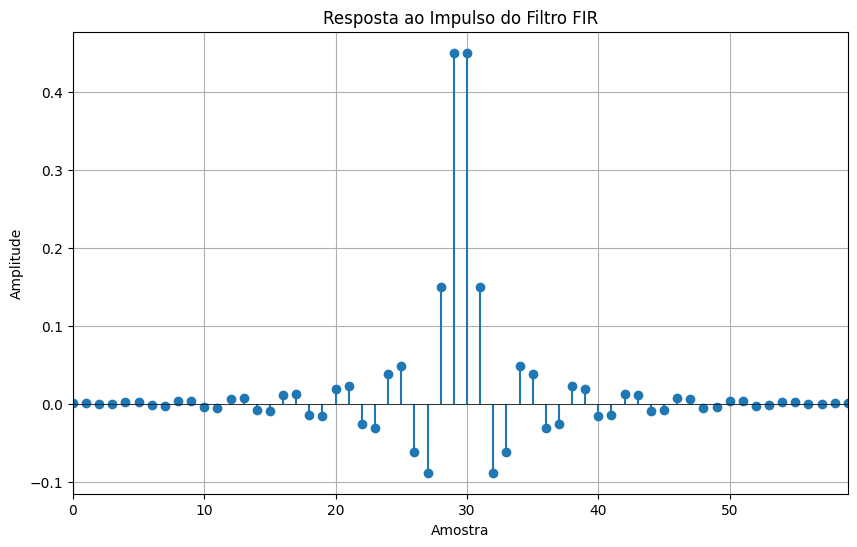

In [53]:
# C√≥digo atualizado para garantir que a fun√ß√£o exiba o gr√°fico corretamente
import numpy as np
import matplotlib.pyplot as plt

# Fun√ß√£o para plotar a resposta ao impulso do filtro FIR
def plot_impulse_response(N, h_fir_original):
    plt.figure(figsize=(10, 6))
    plt.stem(range(N), h_fir_original[:N], basefmt=" ")  # Certificar que o comprimento corresponde a N
    plt.title('Resposta ao Impulso do Filtro FIR')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')
    plt.xlim(0, N - 1)
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)  # Linha central
    plt.grid(True)  # Ativar grade para melhor visualiza√ß√£o
    plt.show()

# Garantir que os coeficientes do filtro est√£o definidos
if 'h_fir_original' in globals():
    plot_impulse_response(len(h_fir_original), h_fir_original)
else:
    print("Erro: h_fir_original n√£o est√° definido.")


Plotamos a resposta ao impulso de um filtro FIR








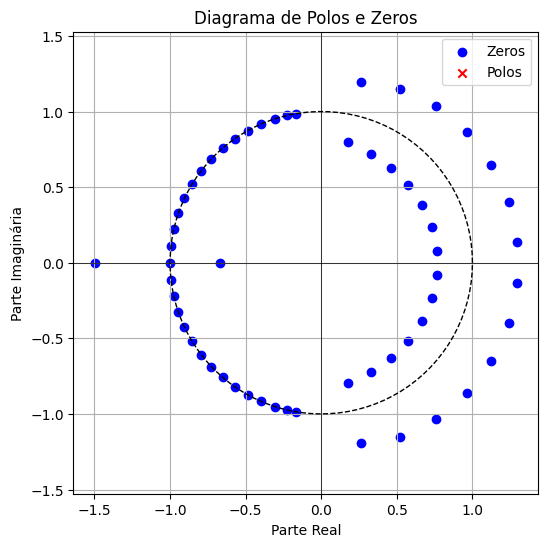

In [62]:
# Obter zeros, polos e ganho
z, p, k = signal.tf2zpk(h_fir_original, [1])  # Zeros, Polos e Ganho

# Criar o diagrama de polos e zeros
plt.figure(figsize=(6, 6))
plt.scatter(np.real(z), np.imag(z), marker='o', color='blue', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='red', label='Polos')

# Desenhar o c√≠rculo unit√°rio
theta = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='dashed', color='black', linewidth=1)

# Configura√ß√£o do gr√°fico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imagin√°ria')
plt.title('Diagrama de Polos e Zeros')
plt.grid(True)
plt.legend()
plt.axis('equal')  # Para manter a propor√ß√£o circular
plt.show()

Essa caracter√≠stica indica que o filtro √© causal e est√°vel, pois os polos n√£o se encontram fora do c√≠rculo unit√°rio. Al√©m disso, a simetria dos zeros sugere que o filtro √© do tipo passa-baixa, pois atenua frequ√™ncias mais altas enquanto preserva as baixas frequ√™ncias. o fato de o filtro possuir um zero na frequ√™ncia
‚àí
ùúã
‚àíœÄ radianos/amostra indica que ele anula a frequ√™ncia de Nyquist (
ùúî
=
ùúã
). Isso refor√ßa a classifica√ß√£o do filtro como um filtro FIR do Tipo 1 e sugere que ele pode ser um filtro passa-baixa.

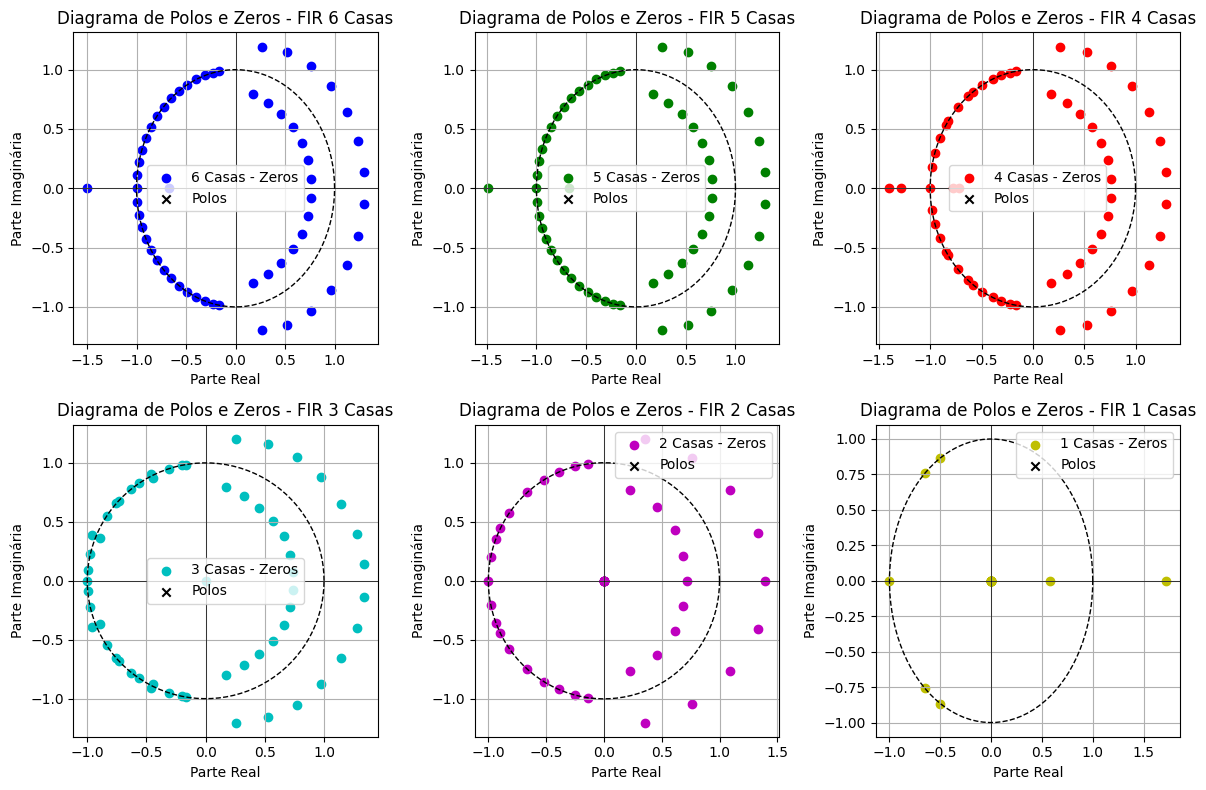

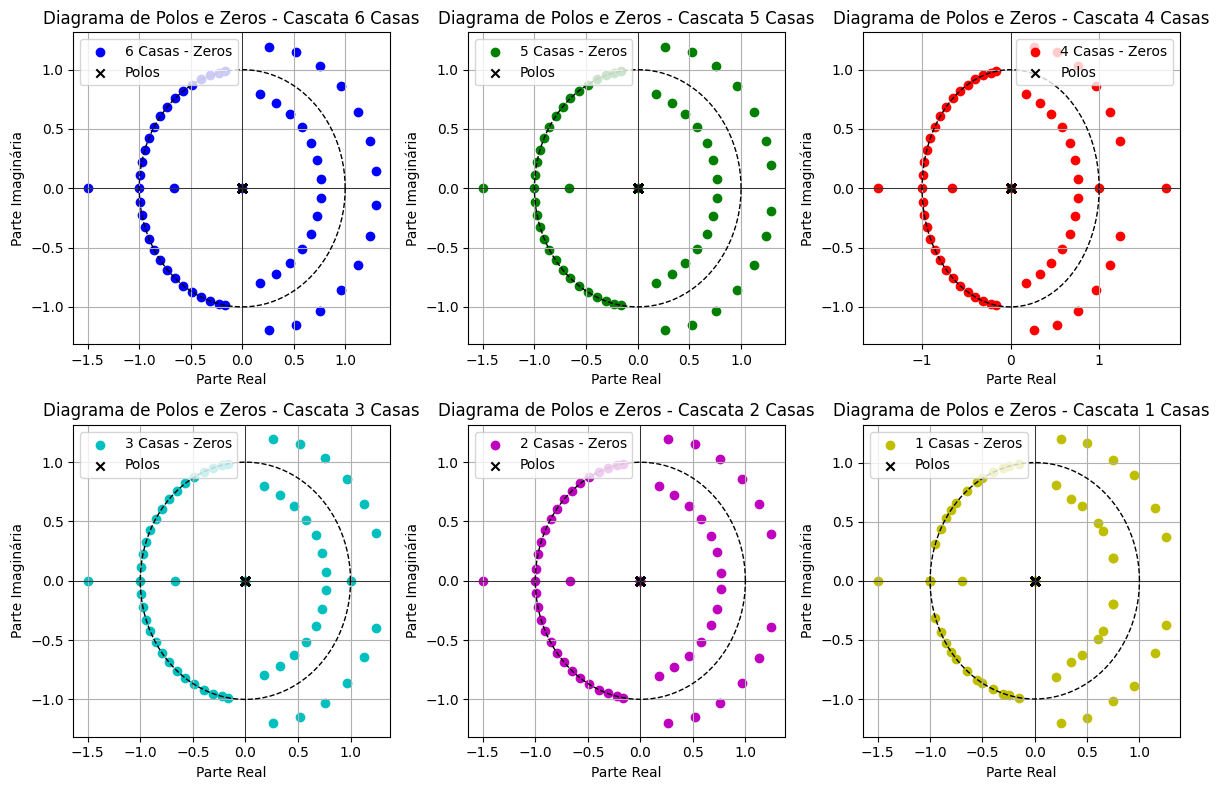

In [90]:

import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Definir par√¢metros do filtro
M = 59  # Ordem do filtro
N = M + 1  # Comprimento correto do filtro
frequencia_corte = 0.5 * np.pi  # Frequ√™ncia de corte normalizada
beta = 4.55  # Par√¢metro da janela de Kaiser

# Criar o filtro FIR com o comprimento correto (N)
h_fir_original = signal.firwin(N, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

# Converter para forma cascata (SOS)
z_fir, p_fir, k_fir = signal.tf2zpk(h_fir_original, [1])  # Zeros, Polos e Ganho (Forma Direta)
sos_cascata = signal.zpk2sos(z_fir, p_fir, k_fir)  # Converter para SOS (Forma Cascata)


precisoes = [6, 5, 4, 3, 2, 1]
cores = ['b', 'g', 'r', 'c', 'm', 'y']

# Criar subplots para diagramas de polos e zeros (Forma Direta)
plt.figure(figsize=(12, 8))
for i, prec in enumerate(precisoes):
    h_fir_quantizado = np.round(h_fir_original, prec)
    z_q, p_q, _ = signal.tf2zpk(h_fir_quantizado, [1])

    plt.subplot(2, 3, i+1)
    plt.scatter(np.real(z_q), np.imag(z_q), marker='o', color=cores[i], label=f'{prec} Casas - Zeros')
    plt.scatter(np.real(p_q), np.imag(p_q), marker='x', color='black', label='Polos')

    # Desenhar o c√≠rculo unit√°rio
    theta = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(theta), np.sin(theta), linestyle='dashed', color='black', linewidth=1)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imagin√°ria')
    plt.title(f'Diagrama de Polos e Zeros - FIR {prec} Casas')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Criar subplots para diagramas de polos e zeros (Forma Cascata)
plt.figure(figsize=(12, 8))
for i, prec in enumerate(precisoes):
    sos_quantizado = np.round(sos_cascata, prec)
    z_cascata, p_cascata, _ = signal.sos2zpk(sos_quantizado)

    plt.subplot(2, 3, i+1)
    plt.scatter(np.real(z_cascata), np.imag(z_cascata), marker='o', color=cores[i], label=f'{prec} Casas - Zeros')
    plt.scatter(np.real(p_cascata), np.imag(p_cascata), marker='x', color='black', label='Polos')

    # Desenhar o c√≠rculo unit√°rio
    plt.plot(np.cos(theta), np.sin(theta), linestyle='dashed', color='black', linewidth=1)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imagin√°ria')
    plt.title(f'Diagrama de Polos e Zeros - Cascata {prec} Casas')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

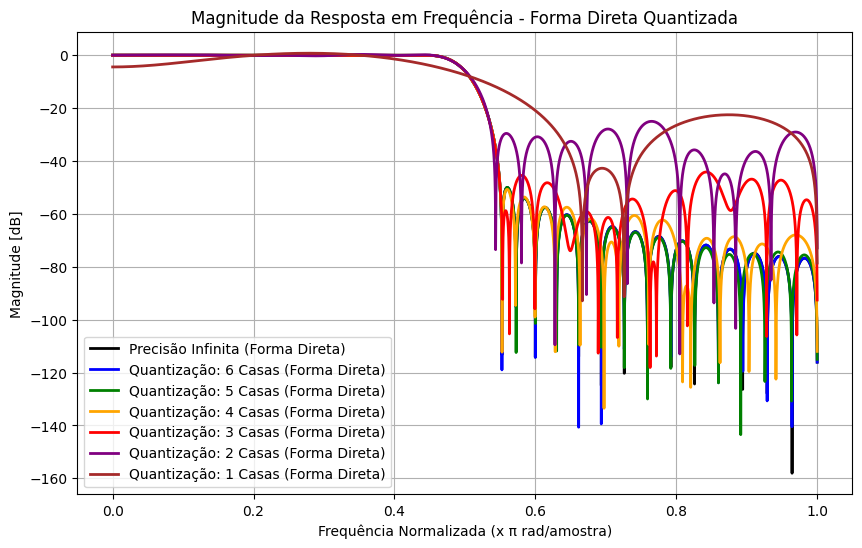

In [54]:
# Atualizar os n√≠veis de quantiza√ß√£o para incluir 2 casas decimais
niveis_quantizacao = [None, 6, 5, 4, 3, 2, 1]
cores = ['black', 'blue', 'green', 'orange', 'red', 'purple', 'brown']
titulos = [
    "Precis√£o Infinita (Forma Direta)",
    "Quantiza√ß√£o: 6 Casas (Forma Direta)",
    "Quantiza√ß√£o: 5 Casas (Forma Direta)",
    "Quantiza√ß√£o: 4 Casas (Forma Direta)",
    "Quantiza√ß√£o: 3 Casas (Forma Direta)",
    "Quantiza√ß√£o: 2 Casas (Forma Direta)",
    "Quantiza√ß√£o: 1 Casas (Forma Direta)"
]

# Criar a figura para um √∫nico gr√°fico com todas as curvas na forma direta
plt.figure(figsize=(10, 6))

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        h_fir = h_fir_original  # Sem quantiza√ß√£o
    else:
        h_fir = np.round(h_fir_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequ√™ncia
    w, H = signal.freqz(h_fir, worN=8000)
    magnitude_H = 20 * np.log10(np.maximum(np.abs(H), 1e-10))  # Evita log(0)

    # Plotar todas as curvas em um √∫nico gr√°fico
    plt.plot(w / np.pi, magnitude_H, color=cor, linewidth=2, label=titulo)

# Configura√ß√£o do gr√°fico
plt.title('Magnitude da Resposta em Frequ√™ncia - Forma Direta Quantizada')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.show()


Enquanto a precis√£o infinita mant√©m o comportamento ideal, quantiza√ß√µes menores causam distor√ß√µes progressivas, especialmente nas altas frequ√™ncias. Com 6 e 5 casas decimais, a resposta permanece est√°vel, mas a partir de 4 casas come√ßam a surgir perturba√ß√µes. Para 3, 2 e 1 casas, h√° forte degrada√ß√£o e oscila√ß√µes acentuadas.  

Na forma direta, o filtro √© implementado diretamente a partir da fun√ß√£o de transfer√™ncia, sem decomposi√ß√£o.

Sensibilidade: A forma direta tende a ser mais sens√≠vel a erros de quantiza√ß√£o, especialmente em filtros de ordem elevada. Isso ocorre porque pequenos erros nos coeficientes podem afetar significativamente a resposta do filtro.

Estabilidade: Em filtros de alta ordem, a forma direta pode ser menos est√°vel numericamente devido ao ac√∫mulo de erros de arredondamento.

Na forma direta, a quantiza√ß√£o afeta todos os coeficientes do filtro simultaneamente.
Pequenas altera√ß√µes nos coeficientes podem provocar mudan√ßas significativas na resposta do filtro, afetando a faixa de transi√ß√£o.
Como os coeficientes s√£o aplicados diretamente em uma √∫nica equa√ß√£o, erros acumulados impactam a resposta de frequ√™ncia globalmente.

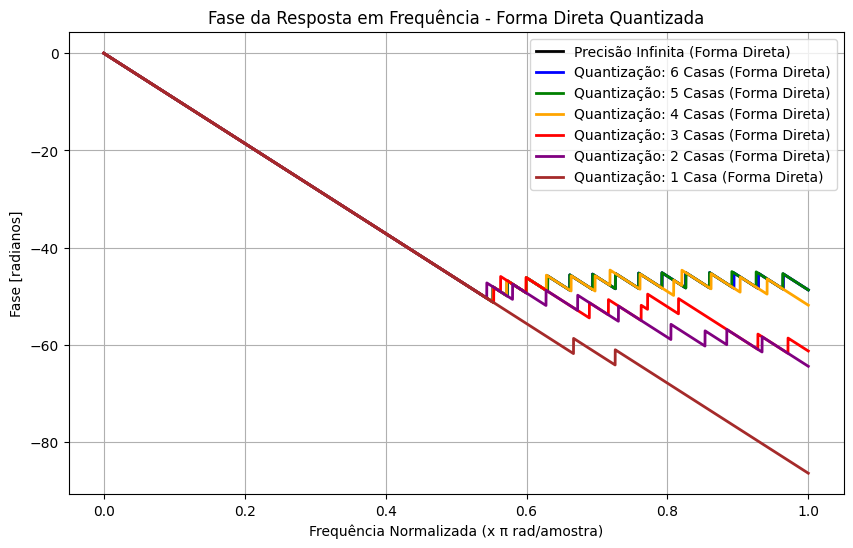

In [55]:
# Adicionar quantiza√ß√µes para 2 e 1 casa decimal
niveis_quantizacao = [None, 6, 5, 4, 3, 2, 1]
cores = ['black', 'blue', 'green', 'orange', 'red', 'purple', 'brown']
titulos = [
    "Precis√£o Infinita (Forma Direta)",
    "Quantiza√ß√£o: 6 Casas (Forma Direta)",
    "Quantiza√ß√£o: 5 Casas (Forma Direta)",
    "Quantiza√ß√£o: 4 Casas (Forma Direta)",
    "Quantiza√ß√£o: 3 Casas (Forma Direta)",
    "Quantiza√ß√£o: 2 Casas (Forma Direta)",
    "Quantiza√ß√£o: 1 Casa (Forma Direta)"
]

# Criar a figura para um √∫nico gr√°fico com todas as curvas de fase sobrepostas
plt.figure(figsize=(10, 6))

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        h_fir = h_fir_original  # Sem quantiza√ß√£o
    else:
        h_fir = np.round(h_fir_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequ√™ncia
    w, H = signal.freqz(h_fir, worN=8000)
    fase_H = np.unwrap(np.angle(H))  # Desfazer descontinuidades na fase

    # Plotar todas as curvas em um √∫nico gr√°fico
    plt.plot(w / np.pi, fase_H, color=cor, linewidth=2, label=titulo)

# Configura√ß√£o do gr√°fico
plt.title('Fase da Resposta em Frequ√™ncia - Forma Direta Quantizada')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Fase [radianos]')
plt.grid(True)
plt.legend()
plt.show()


A diferen√ßa na fase da resposta em frequ√™ncia conforme a precis√£o diminui ocorre devido aos erros de quantiza√ß√£o nos coeficientes do filtro FIR. A quantiza√ß√£o introduz pequenas varia√ß√µes nos coeficientes, o que altera ligeiramente a posi√ß√£o dos polos e zeros do filtro. Essas varia√ß√µes afetam a fase ao longo da banda de frequ√™ncia, especialmente nas frequ√™ncias mais altas, onde o efeito da quantiza√ß√£o se torna mais pronunciado. Conforme o n√∫mero de casas decimais diminui, os erros de arredondamento acumulam-se, resultando em uma fase menos linear e introduzindo distor√ß√µes percept√≠veis

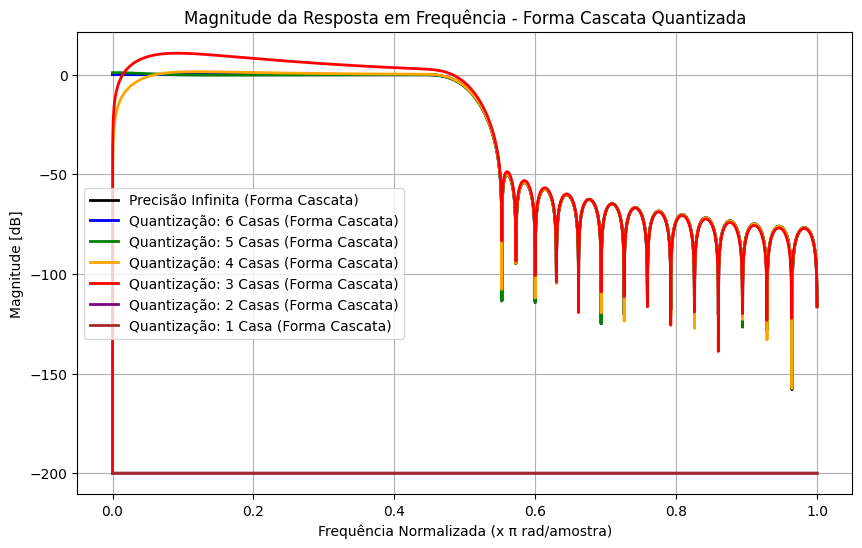

In [61]:
# Criar a figura para um √∫nico gr√°fico com todas as curvas e legenda
plt.figure(figsize=(10, 6))

# Converter para forma cascata (Second-Order Sections - SOS)
sos_cascata_original = signal.tf2sos(h_fir_original, [1])

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        sos = sos_cascata_original  # Sem quantiza√ß√£o
    else:
        sos = np.round(sos_cascata_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequ√™ncia
    w, H = signal.sosfreqz(sos, worN=8000)
    magnitude_H = 20 * np.log10(np.maximum(np.abs(H), 1e-10))  # Evita log(0)

    # Plotar todas as curvas em um √∫nico gr√°fico
    plt.plot(w / np.pi, magnitude_H, color=cor, linewidth=2, label=titulo)

# Configura√ß√£o do gr√°fico
plt.title('Magnitude da Resposta em Frequ√™ncia - Forma Cascata Quantizada')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.show()


Na forma em cascata, o filtro √© decomposto em se√ß√µes de segunda ordem (ou de primeira ordem, se necess√°rio), conectadas em s√©rie.

Sensibilidade: A forma em cascata √© geralmente menos sens√≠vel a erros de quantiza√ß√£o, pois cada se√ß√£o de segunda ordem √© implementada de forma independente, reduzindo a propaga√ß√£o de erros.

Estabilidade: A forma em cascata √© mais est√°vel numericamente, especialmente para filtros de alta ordem, pois os polos e zeros s√£o agrupados em se√ß√µes menores, minimizando problemas de precis√£o.

### An√°lise da Sensibilidade √† Quantiza√ß√£o
Vamos comparar a resposta em frequ√™ncia do filtro com precis√£o infinita e com precis√£o finita

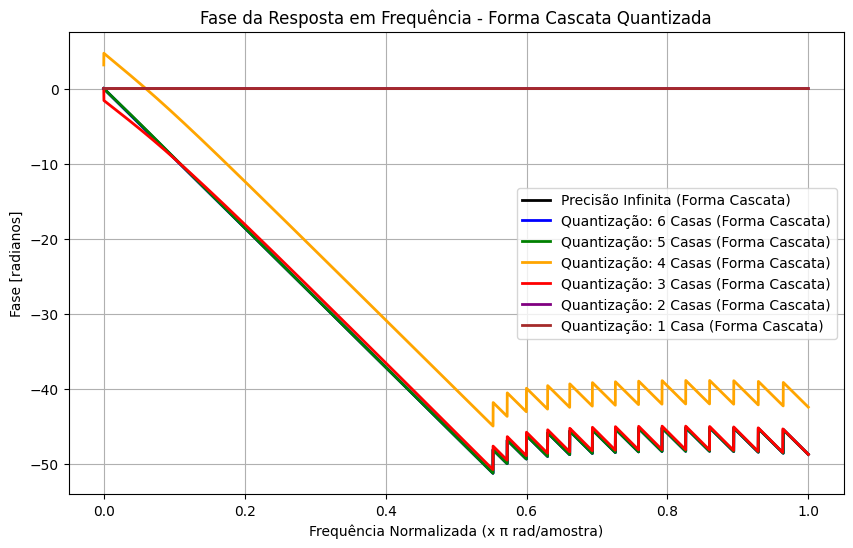

In [73]:
# Converter para forma cascata (Second-Order Sections - SOS)
sos_cascata_original = signal.tf2sos(h_fir_original, [1])

# Definir novos n√≠veis de quantiza√ß√£o para 6, 5, 4, 3, 2 e 1 casas decimais
niveis_quantizacao = [None, 6, 5, 4, 3, 2, 1]
cores = ['black', 'blue', 'green', 'orange', 'red', 'purple', 'brown']
titulos = [
    "Precis√£o Infinita (Forma Cascata)",
    "Quantiza√ß√£o: 6 Casas (Forma Cascata)",
    "Quantiza√ß√£o: 5 Casas (Forma Cascata)",
    "Quantiza√ß√£o: 4 Casas (Forma Cascata)",
    "Quantiza√ß√£o: 3 Casas (Forma Cascata)",
    "Quantiza√ß√£o: 2 Casas (Forma Cascata)",
    "Quantiza√ß√£o: 1 Casa (Forma Cascata)"
]

# Criar a figura para um √∫nico gr√°fico com todas as curvas de fase sobrepostas
plt.figure(figsize=(10, 6))

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        sos = sos_cascata_original  # Sem quantiza√ß√£o
    else:
        sos = np.round(sos_cascata_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequ√™ncia
    w, H = signal.sosfreqz(sos, worN=8000)
    fase_H = np.unwrap(np.angle(H))  # Desfazer descontinuidades na fase

    # Plotar todas as curvas em um √∫nico gr√°fico
    plt.plot(w / np.pi, fase_H, color=cor, linewidth=2, label=titulo)

# Configura√ß√£o do gr√°fico
plt.title('Fase da Resposta em Frequ√™ncia - Forma Cascata Quantizada')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Fase [radianos]')
plt.grid(True)
plt.legend()
plt.show()

Com base nos gr√°ficos analisados, podemos concluir que a forma direta de implementa√ß√£o de filtros FIR √© significativamente mais sens√≠vel √† quantiza√ß√£o dos coeficientes, ou seja, √† redu√ß√£o do n√∫mero de casas decimais. Isso se deve ao fato de que pequenas altera√ß√µes nos coeficientes afetam diretamente a resposta em frequ√™ncia do filtro, resultando em mudan√ßas percept√≠veis na magnitude. Por outro lado, a forma em cascata demonstrou maior robustez √† quantiza√ß√£o, mantendo uma resposta em frequ√™ncia mais est√°vel mesmo com a redu√ß√£o do n√∫mero de casas decimais. Essa diferen√ßa ocorre porque a estrutura em cascata divide o filtro em se√ß√µes de segunda ordem, limitando a propaga√ß√£o de erros e tornando-a mais adequada para implementa√ß√µes em sistemas com precis√£o finita. Portanto, a forma em cascata √© prefer√≠vel em aplica√ß√µes pr√°ticas onde a quantiza√ß√£o dos coeficientes √© inevit√°vel.



### Transforma√ß√µes em frequ√™ncia


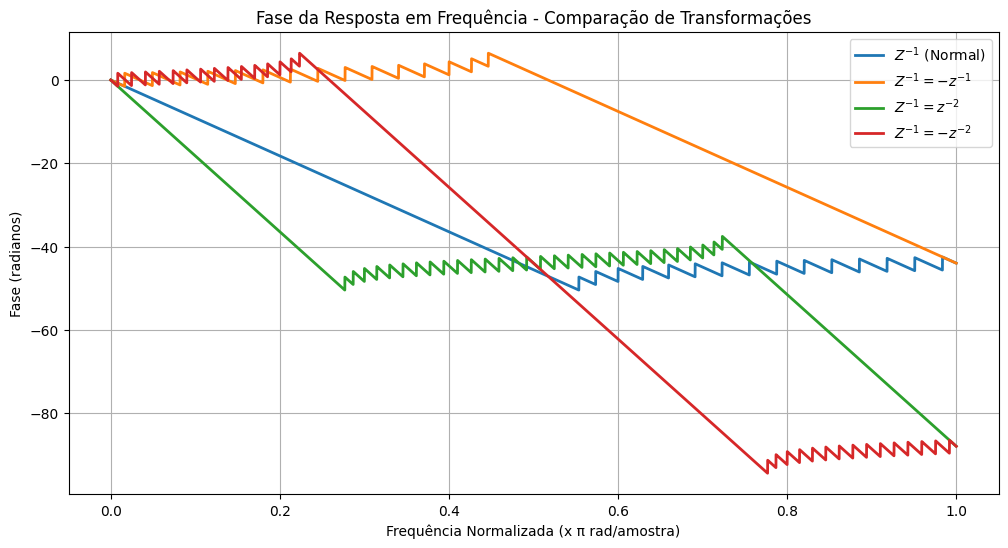

In [58]:
# Reimportar as bibliotecas ap√≥s o reset do estado
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Par√¢metros do filtro
atenuacao_desejada = 50  # dB
frequencia_corte = np.pi / 2  # œâc = œÄ/2
largura_transicao = 0.1 * np.pi  # Œîœâ < 0,1œÄ

# C√°lculo do par√¢metro Œ≤
beta = 0.5842 * (atenuacao_desejada - 21) ** 0.4 + 0.07886 * (atenuacao_desejada - 21)

# C√°lculo da ordem M do filtro (num_taps)
M = int(np.ceil((atenuacao_desejada - 8) / (2.285 * largura_transicao)))

# Projeta o filtro FIR
h_fir = signal.firwin(M, frequencia_corte/np.pi, window=('kaiser', beta), scale=False)

# Fun√ß√£o para aplicar as transforma√ß√µes no filtro FIR
def transformar_filtro1(h_fir, transformacao):
    if transformacao == 1:
        # Z^{-1} = -z^{-1}
        return h_fir * (-1) ** np.arange(len(h_fir))
    elif transformacao == 2:
        # Z^{-1} = z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir
        return novos_h_fir
    elif transformacao == 3:
        # Z^{-1} = -z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir * (-1) ** np.arange(len(h_fir))
        return novos_h_fir

# Definir as transforma√ß√µes aplicadas ao filtro
transformacoes = [
    (r'$Z^{-1}$ (Normal)', h_fir),
    (r'$Z^{-1} = -z^{-1}$', transformar_filtro1(h_fir, 1)),
    (r'$Z^{-1} = z^{-2}$', transformar_filtro1(h_fir, 2)),
    (r'$Z^{-1} = -z^{-2}$', transformar_filtro1(h_fir, 3))
]

# Criar o gr√°fico com todas as fases das transforma√ß√µes
plt.figure(figsize=(12, 6))

for nome, h_transf in transformacoes:
    w_transf, resposta_transformada = signal.freqz(h_transf, worN=8000)
    fase_resposta = np.unwrap(np.angle(resposta_transformada))  # Corrigir descontinuidades
    plt.plot(w_transf / np.pi, fase_resposta, label=nome, linewidth=2)

# Configura√ß√£o do gr√°fico
plt.title('Fase da Resposta em Frequ√™ncia - Compara√ß√£o de Transforma√ß√µes')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Fase (radianos)')
plt.grid(True)
plt.legend()
plt.show()


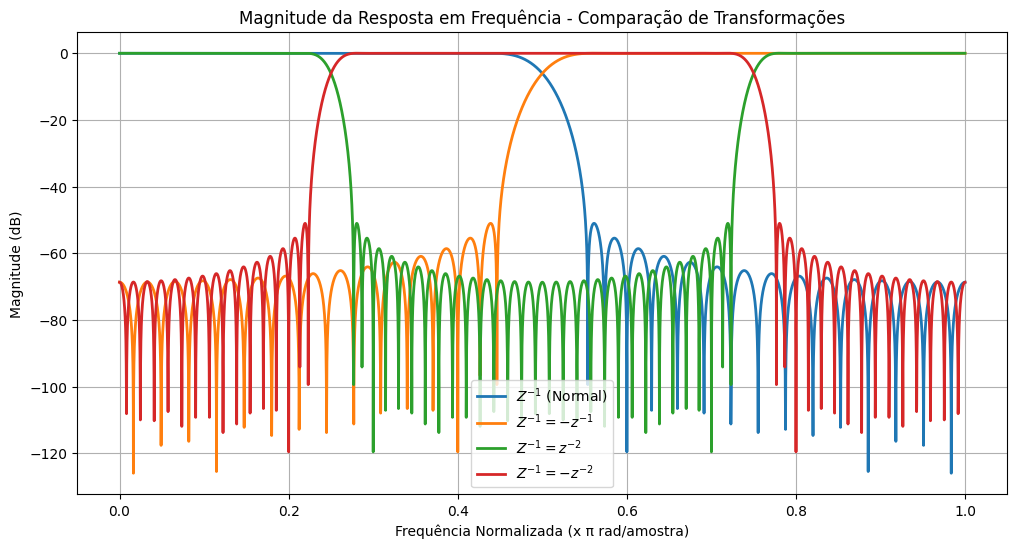

In [59]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Par√¢metros do filtro FIR
M = 59  # Ordem do filtro
frequencia_corte = 0.5 * np.pi  # Frequ√™ncia de corte normalizada
beta = 4.55  # Par√¢metro da janela de Kaiser (corrigido)

# Criar o filtro FIR
h_fir = signal.firwin(M, frequencia_corte/np.pi, window=('kaiser', beta), scale=False)

# Fun√ß√£o para aplicar transforma√ß√µes no filtro FIR
def transformar_filtro1(h_fir, transformacao):
    if transformacao == 1:
        # Z^{-1} = -z^{-1}
        return h_fir * (-1) ** np.arange(len(h_fir))
    elif transformacao == 2:
        # Z^{-1} = z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir
        return novos_h_fir
    elif transformacao == 3:
        # Z^{-1} = -z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir * (-1) ** np.arange(len(h_fir))
        return novos_h_fir

# Aplicar as transforma√ß√µes no filtro
transformacoes = [
    (r'$Z^{-1}$ (Normal)', h_fir),
    (r'$Z^{-1} = -z^{-1}$', transformar_filtro1(h_fir, 1)),
    (r'$Z^{-1} = z^{-2}$', transformar_filtro1(h_fir, 2)),
    (r'$Z^{-1} = -z^{-2}$', transformar_filtro1(h_fir, 3))
]

# Criar o gr√°fico com todas as magnitudes
plt.figure(figsize=(12, 6))

for nome, h_transf in transformacoes:
    w_transf, resposta_transformada = signal.freqz(h_transf, worN=8000)
    magnitude_resposta = np.abs(resposta_transformada)  # Obter a magnitude
    plt.plot(w_transf / np.pi, 20 * np.log10(magnitude_resposta), label=nome, linewidth=2)  # Em dB

# Configura√ß√£o do gr√°fico
plt.title('Magnitude da Resposta em Frequ√™ncia - Compara√ß√£o de Transforma√ß√µes')
plt.xlabel('Frequ√™ncia Normalizada (x œÄ rad/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()
plt.show()


### Resultados
